In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
model = models.Sequential([

    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_split=0.1,
    batch_size=64
)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 49s 56ms/step - accuracy: 0.8781 - loss: 0.4013 - val_accuracy: 0.9840 - val_loss: 0.0527
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 45s 53ms/step - accuracy: 0.9819 - loss: 0.0579 - val_accuracy: 0.9858 - val_loss: 0.0465
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 54ms/step - accuracy: 0.9895 - loss: 0.0347 - val_accuracy: 0.9873 - val_loss: 0.0454
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 44s 52ms/step - accuracy: 0.9923 - loss: 0.0257 - val_accuracy: 0.9917 - val_loss: 0.0343
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 84s 55ms/step - accuracy: 0.9933 - loss: 0.0217 - val_accuracy: 0.9907 - val_loss: 0.0385


In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9890 - loss: 0.0366
Test Accuracy: 0.9908999800682068


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


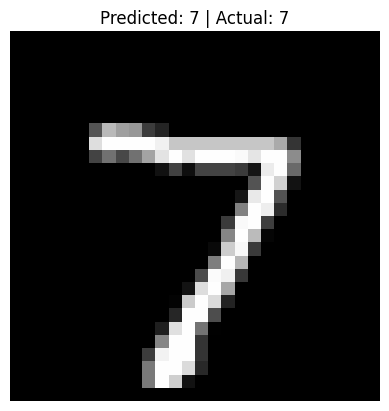

In [ ]:
predictions = model.predict(x_test)

plt.imshow(x_test[0].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {predictions[0].argmax()} | Actual: {y_test[0]}")
plt.axis('off')
plt.show()